In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
import sys
# Set sys path
sys.path.append(str(Path(os.getcwd()).parent))

In [3]:
# Adjust matplotlib settings for font inclusion
plt.rcParams['pdf.fonttype'] = 42  # Use Type 3 (PostScript) fonts
plt.rcParams['ps.fonttype'] = 42

# Set filpaths for data and figures
notebook_dir = os.getcwd()
file_path = Path(notebook_dir).parent / 'data' 

# Load Data

In [4]:
df = pd.read_csv(file_path / "AD_CSF_20sample_subset_per_cohort.pg_matrix.tsv", sep='\t')
gene_dict = dict(zip(df['Protein.Group'], df['Genes']))
prot = df.set_index('Protein.Group').iloc[:,4:].T
prot.index = [a.split('/')[-1] for a in prot.index]
prot.index = [a.split('.')[0] for a in prot.index]
prot = np.log10(prot.replace(0, np.nan))

In [7]:
d_Rest = pd.read_csv(file_path / 'AD_CSF_Rest_cohorts_minus20sample_subset.pg_matrix.tsv', sep='\t')
d_Rest_prot = d_Rest.set_index('Protein.Group').iloc[:,4:].T
d_Rest_prot.index = [a.split('/')[-1] for a in d_Rest_prot.index]
d_Rest_prot.index = [a.split('.')[0] for a in d_Rest_prot.index]
d_Rest_prot = np.log10(d_Rest_prot.replace(0, np.nan))

In [5]:
d_groups = pd.read_excel(file_path / "annotation of samples_AM1.5.11.xlsx")
d_groups = d_groups.dropna(subset='sample name')
cat = d_groups.set_index('sample name')[['biochemical AD classification']]
cat.index = [a.split('.')[0] for a in cat.index]

# xgboost with holdout_batch testset and scambled labels

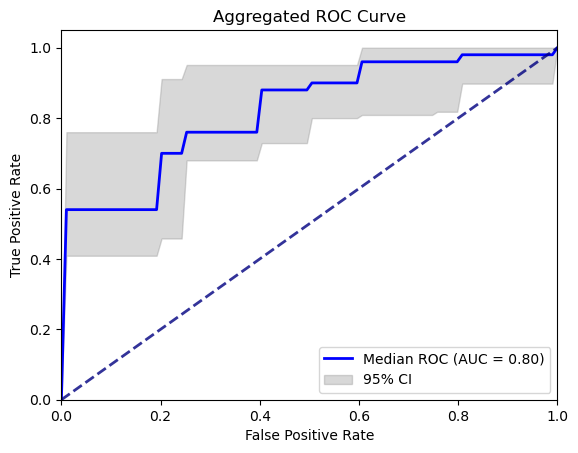

In [6]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot, cat, gene_dict, between='biochemical AD classification')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot('biochemical control', 'biochemical AD', n_runs=10, n_estimators=100)

# Rest cohort

In [8]:
# Find shared columns
shared_columns = prot.columns.intersection(d_Rest_prot.columns)

# Keep only shared columns in both DataFrames
prot_shared = prot[shared_columns]
d_Rest_prot_shared = d_Rest_prot[shared_columns]

# t-test feature selction and Logistic regression on top 50

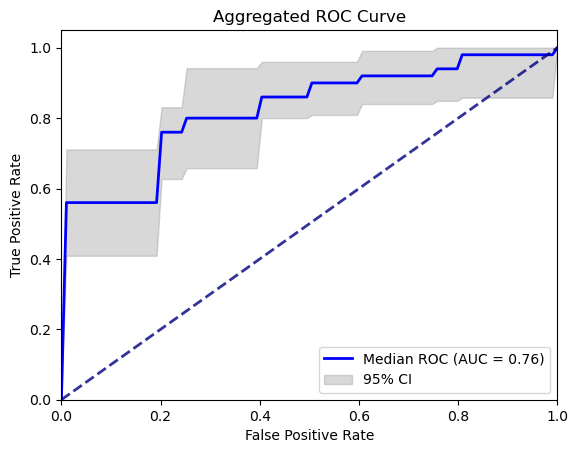

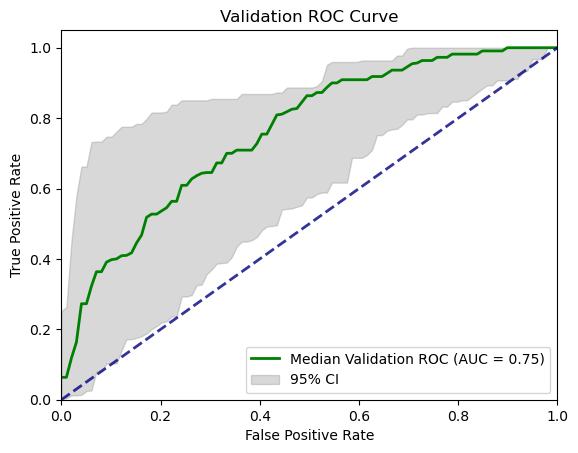

In [9]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_shared, cat, gene_dict, between='biochemical AD classification')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot('biochemical control', 'biochemical AD', n_runs=10, n_estimators=50)
baseline.validate_and_plot(d_Rest_prot_shared, cat, 'biochemical control', 'biochemical AD')

# ADAPT-MS

In [11]:
cat_Rest = cat.copy()
cat_Rest.index = [a+'.mzML' for a in cat_Rest.index]

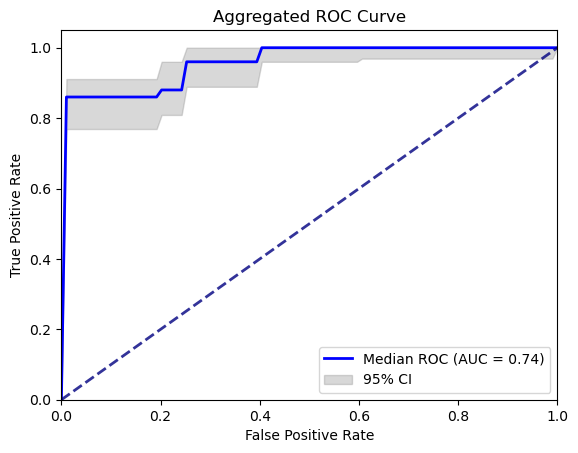

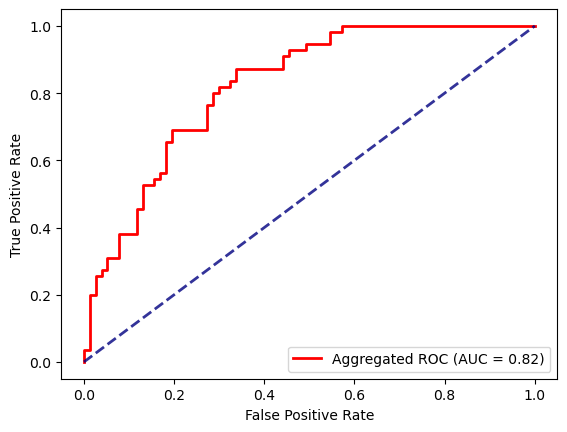

In [ ]:
from utils.AdaptmsClassifier import AdaptmsClassifierFolder
#Initialize the classifier
adaptms = AdaptmsClassifierFolder(prot, cat, gene_dict, between='biochemical AD classification')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot('biochemical control', 'biochemical AD')

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_directory(file_path / 'Single_file_results/Train_20sample_subset_apply_to_rest', cat_Rest, 'biochemical control', 'biochemical AD')
adaptms.plot_accumulated_roc('biochemical control', 'biochemical AD')

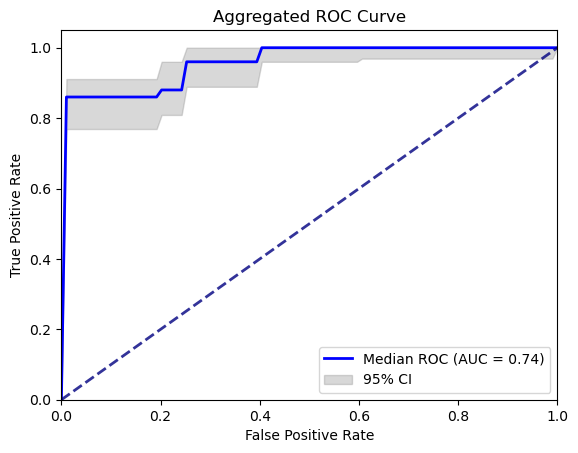

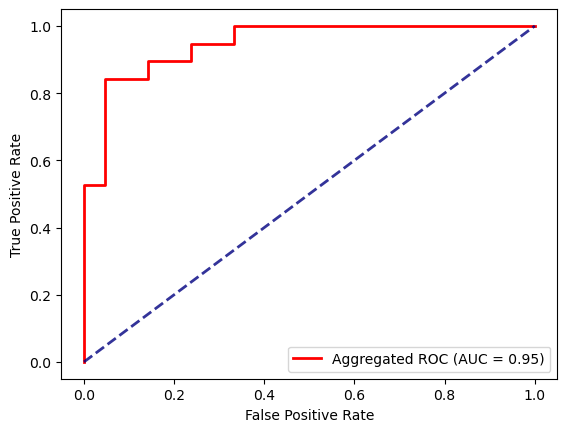

In [21]:
#Initialize the classifier
adaptms = AdaptmsClassifierFolder(prot, cat, gene_dict, between='biochemical AD classification', cohort='CSF1')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot('biochemical control', 'biochemical AD')

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_directory(file_path / 'Single_file_results/Train_20sample_subset_apply_to_rest', cat_Rest, 'biochemical control', 'biochemical AD')
adaptms.plot_accumulated_roc('biochemical control', 'biochemical AD')

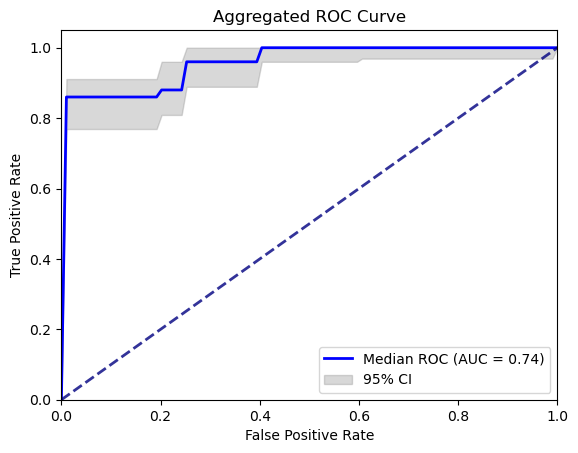

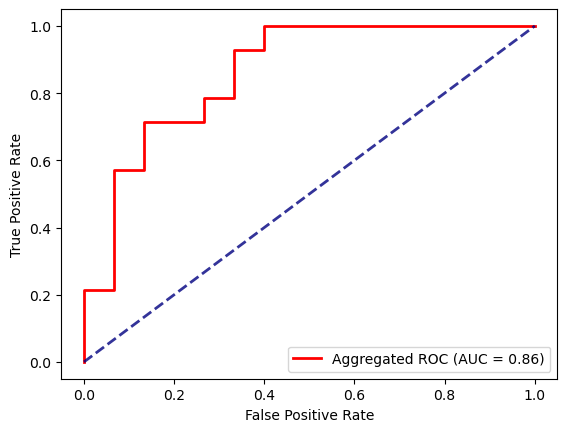

In [22]:
#Initialize the classifier
adaptms = AdaptmsClassifierFolder(prot, cat, gene_dict, between='biochemical AD classification', cohort='Majken')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot('biochemical control', 'biochemical AD')

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_directory(file_path / 'Single_file_results/Train_20sample_subset_apply_to_rest', cat_Rest, 'biochemical control', 'biochemical AD')
adaptms.plot_accumulated_roc('biochemical control', 'biochemical AD')

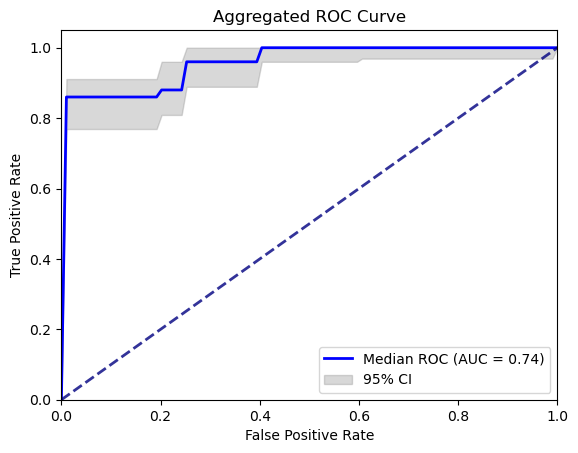

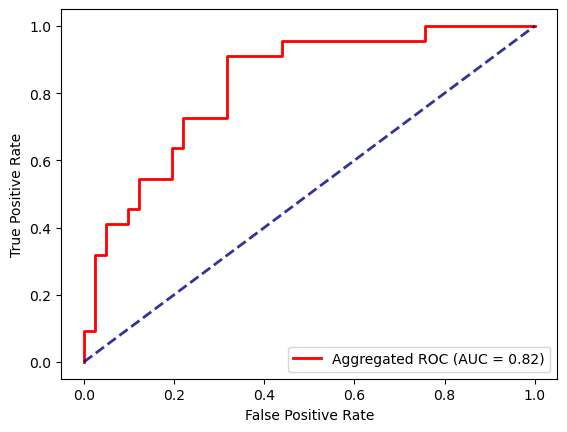

In [23]:
#Initialize the classifier
adaptms = AdaptmsClassifierFolder(prot, cat, gene_dict, between='biochemical AD classification', cohort='Deigendesch')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot('biochemical control', 'biochemical AD')

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_directory(file_path / 'Single_file_results/Train_20sample_subset_apply_to_rest', cat_Rest, 'biochemical control', 'biochemical AD')
adaptms.plot_accumulated_roc('biochemical control', 'biochemical AD')

# ADAPT-MS train only on self-cohort

In [24]:
berlin_samples = [a for a in prot.index if 'Deigendesch' in a]
sweden_samples = [a for a in prot.index if 'CSF1' in a]
mag_samples = [a for a in prot.index if 'Majken' in a]

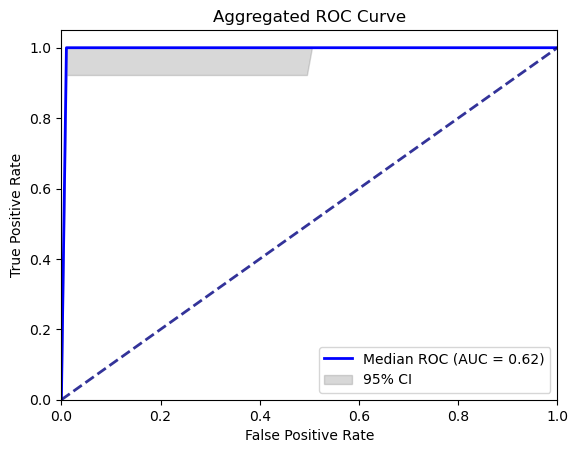

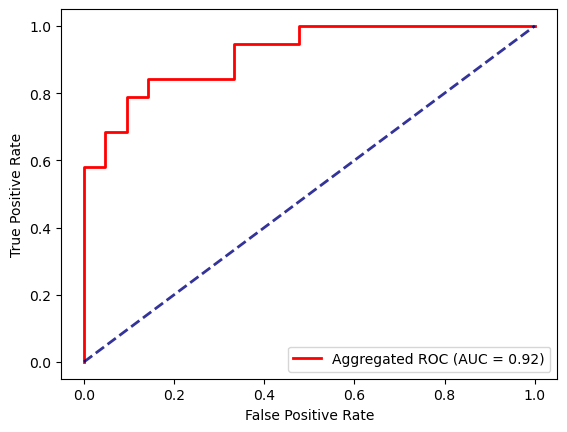

In [31]:
#Initialize the classifier
adaptms = AdaptmsClassifierFolder(prot.loc[sweden_samples].dropna(axis=1, how='all'), cat.loc[sweden_samples], gene_dict, between='biochemical AD classification', cohort='CSF1')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot('biochemical control', 'biochemical AD')

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_directory(file_path / 'Single_file_results/Train_20sample_subset_apply_to_rest', cat_Rest, 'biochemical control', 'biochemical AD')
adaptms.plot_accumulated_roc('biochemical control', 'biochemical AD')

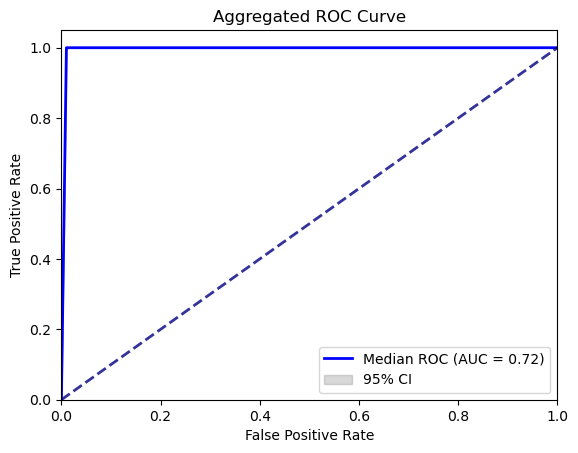

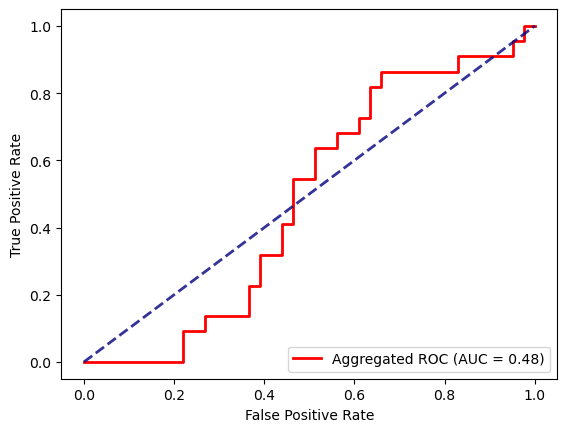

In [29]:
#Initialize the classifier
adaptms = AdaptmsClassifierFolder(prot.loc[berlin_samples].dropna(axis=1, how='all'), cat.loc[berlin_samples], gene_dict, between='biochemical AD classification', cohort='Deigendesch')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot('biochemical control', 'biochemical AD')

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_directory(file_path / 'Single_file_results/Train_20sample_subset_apply_to_rest', cat_Rest, 'biochemical control', 'biochemical AD')
adaptms.plot_accumulated_roc('biochemical control', 'biochemical AD')

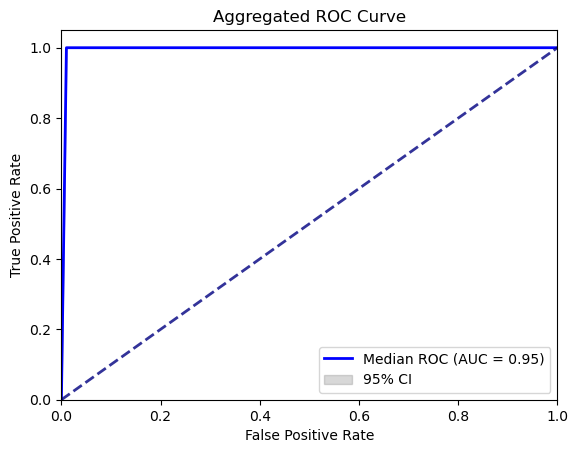

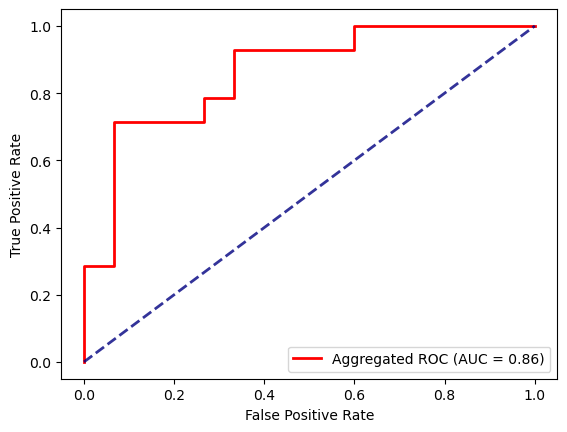

In [30]:
#Initialize the classifier
adaptms = AdaptmsClassifierFolder(prot.loc[mag_samples].dropna(axis=1, how='all'), cat.loc[mag_samples], gene_dict, between='biochemical AD classification', cohort='Majken')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot('biochemical control', 'biochemical AD')

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_directory(file_path / 'Single_file_results/Train_20sample_subset_apply_to_rest', cat_Rest, 'biochemical control', 'biochemical AD')
adaptms.plot_accumulated_roc('biochemical control', 'biochemical AD')